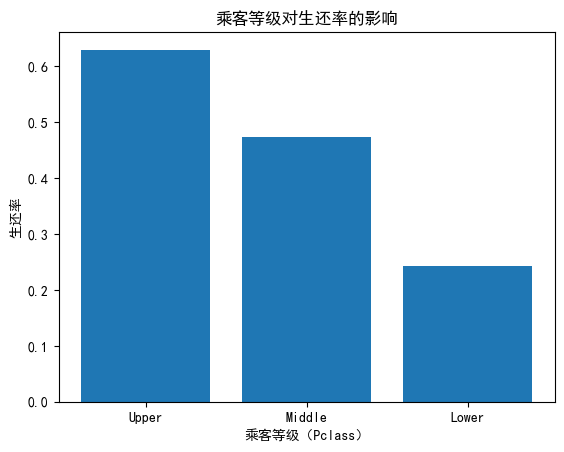

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 关键：设置支持中文的字体，解决中文显示异常问题
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 指定 SimHei（黑体）等中文字体
plt.rcParams["axes.unicode_minus"] = False    # 解决负号显示为方块的问题

# 读取数据（确保 train.csv 路径正确，若和代码文件同目录可直接写文件名）
data = pd.read_csv('train.csv')  

# 按乘客等级分组，计算每组生还率（mean 是因为 Survived 里 1 代表获救、0 代表未获救，均值即生还率）
survival_rates = data.groupby('Pclass')['Survived'].mean()  

# 绘制直方图
plt.bar(
    survival_rates.index,  # x 轴数据：乘客等级（1、2、3）
    survival_rates.values, # y 轴数据：对应等级的生还率
)
plt.xlabel('乘客等级（Pclass）')   # 设置 x 轴标签
plt.ylabel('生还率')              # 设置 y 轴标签
plt.title('乘客等级对生还率的影响') # 设置图表标题
plt.xticks([1, 2, 3], ['Upper', 'Middle', 'Lower'])  # 替换 x 轴刻度为对应等级名称

# 显示图表（替代原 plt.savefig，直接弹出窗口展示）
plt.show()  

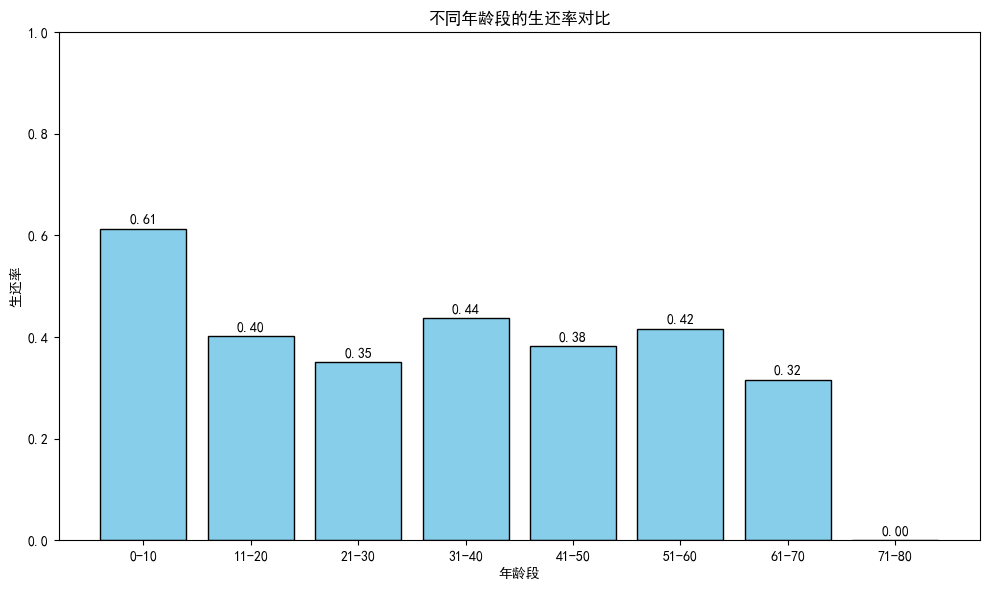

In [17]:
# 创建年龄分组
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 关键修改：添加 observed=True，按实际存在的 AgeGroup 类别分组计算
survival_by_age = data.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()

# 绘制直方图等后续代码...
plt.figure(figsize=(10, 6))  
plt.bar(survival_by_age['AgeGroup'], survival_by_age['Survived'], 
        color='skyblue', edgecolor='black')

for i, v in enumerate(survival_by_age['Survived']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=10)

plt.title('不同年龄段的生还率对比')
plt.xlabel('年龄段')
plt.ylabel('生还率')
plt.ylim(0, 1)  

plt.tight_layout()  
plt.show()

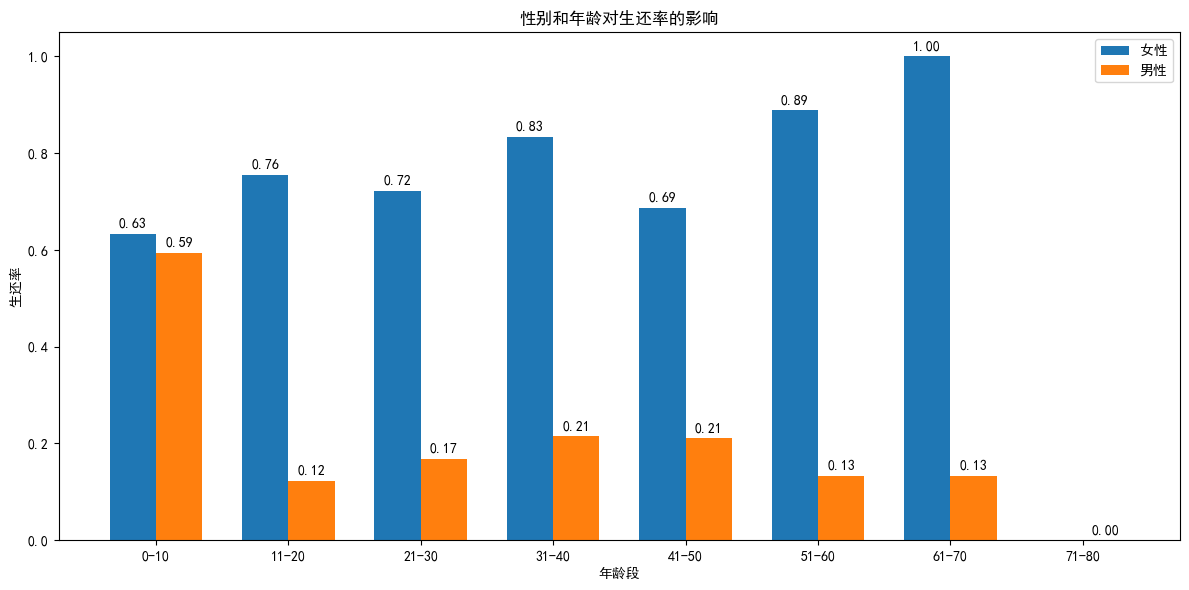

In [22]:
import numpy as np
# 创建年龄分组
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 关键修改：添加 observed=True，按实际存在的组合分组计算
grouped = data.groupby(['Sex', 'AgeGroup'], observed=True)['Survived'].mean().unstack()

# 绘制分组柱状图
x = np.arange(len(grouped.columns))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, grouped.loc['female'], width, label='女性')
rects2 = ax.bar(x + width/2, grouped.loc['male'], width, label='男性')

# 添加标签和标题
ax.set_xlabel('年龄段')
ax.set_ylabel('生还率')
ax.set_title('性别和年龄对生还率的影响')
ax.set_xticks(x)
ax.set_xticklabels(grouped.columns)
ax.legend()

# 添加数据标签
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()